# Cómputo Cuántico en la nube

## 1. Configuración

Se debe contar con las siguientes bibliotecas: 
```shell 
pip install qiskit qiskit-ibm-provider qiskit-ibm-runtime qiskit-aer 
pip install matplotlib pylatexenc 
``` 

Crear una cuenta en: [IBM Quantum Platform](https://quantum.ibm.com/). Iniciar sesión en ir a Dashboard. 

![Screenshot from 2024-09-23 10-12-03.png](<attachment:Screenshot from 2024-09-23 10-12-03.png>)
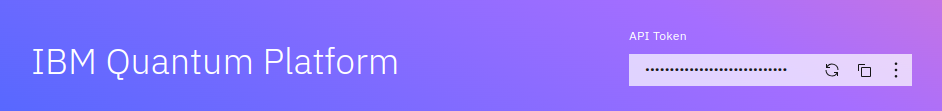

Copiar el API Token

In [18]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, Options, Sampler
from qiskit_ibm_provider import IBMProvider, least_busy
import numpy  as np

Si es la primera vez que se ejecuta las siguientes líneas, el token se guarda en el disco duro en la dirección **$HOME/.qiskit/qiskit-ibm.json**. 

Solo debe ejecutarse una vez **QiskitRuntimeService.save_account()** para que se guarde el token. 

In [ ]:
API_token = ""
QiskitRuntimeService.save_account(channel="ibm_quantum", token=API_token)

In [ ]:
print("Nombre del sistema           Número de Qubits")
print("---------------------------------------------")
print(provider.backends())
for backend in provider.backends():
    config = backend.configuration()
    print(f"{config.backend_name:22}       {config.n_qubits:>3}")

In [ ]:
device = least_busy(provider.backends(
    filters=lambda x : x.configuration().n_qubits >=3 and
        not x.configuration().simulator
        and x.status().operational == True
))

In [17]:
def fx_amod15(a, power):
    U = QuantumCircuit(4)
    for i in range(power):
        U.swap(2,3)
        U.swap(1,2)
        U.swap(0,1)
        for q in range(4):
            U.x(q)
    U = U.to_gate()
    U.name = "%i ^ %i mod 15"%(a,power)
    c_U = U.control()
    return c_U

In [24]:
def QFTi(n):
    qc = QuantumCircuit(n)
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for k in range(n):
            if k != j:
                qc.cu(-np.pi/float(2**(j-k)), 0, 0, 0, k, j)
        qc.h(j)
    qc.name = "QFTi"
    return qc

In [25]:
n_qubits = 8 #num qubits
a = 7       # base

In [26]:
qc = QuantumCircuit(n_qubits+4, n_qubits)

In [27]:
for q in range(n_qubits):
    qc.h(q)
qc.x(3+n_qubits)
for q in range(n_qubits):
    qc.append(fx_amod15(a,2**q), [q]+[i + n_qubits for i in range(4)])
qc.append(QFTi(n_qubits), range(n_qubits))
qc.measure(range(n_qubits), range(n_qubits))
qc.draw('text')

┌───┐                                                                    »
 q_0: ┤ H ├────────■───────────────────────────────────────────────────────────»
      ├───┤        │                                                           »
 q_1: ┤ H ├────────┼────────────────■──────────────────────────────────────────»
      ├───┤        │                │                                          »
 q_2: ┤ H ├────────┼────────────────┼────────────────■─────────────────────────»
      ├───┤        │                │                │                         »
 q_3: ┤ H ├────────┼────────────────┼────────────────┼────────────────■────────»
      ├───┤        │                │                │                │        »
 q_4: ┤ H ├────────┼────────────────┼────────────────┼────────────────┼────────»
      ├───┤        │                │                │                │        »
 q_5: ┤ H ├────────┼────────────────┼────────────────┼────────────────┼────────»
      ├───┤        │                │                │                │        »
 q_6: ┤ H ├────────┼────────────────┼────────────────┼────────────────┼────────»
      ├───┤        │                │                │                │        »
 q_7: ┤ H ├────────┼────────────────┼────────────────┼────────────────┼────────»
      └───┘┌───────┴───────┐┌───────┴───────┐┌───────┴───────┐┌───────┴───────┐»
 q_8: ─────┤0              ├┤0              ├┤0              ├┤0              ├»
           │               ││               ││               ││               │»
 q_9: ─────┤1              ├┤1              ├┤1              ├┤1              ├»
           │  7 ^ 1 mod 15 ││  7 ^ 2 mod 15 ││  7 ^ 4 mod 15 ││  7 ^ 8 mod 15 │»
q_10: ─────┤2              ├┤2              ├┤2              ├┤2              ├»
      ┌───┐│               ││               ││               ││               │»
q_11: ┤ X ├┤3              ├┤3              ├┤3              ├┤3              ├»
      └───┘└───────────────┘└───────────────┘└───────────────┘└───────────────┘»
 c: 8/═════════════════════════════════════════════════════════════════════════»
                                                                               »
«                                                            »
« q_0: ──────────────────────────────────────────────────────»
«                                                            »
« q_1: ──────────────────────────────────────────────────────»
«                                                            »
« q_2: ──────────────────────────────────────────────────────»
«                                                            »
« q_3: ──────────────────────────────────────────────────────»
«                                                            »
« q_4: ────────■─────────────────────────────────────────────»
«              │                                             »
« q_5: ────────┼─────────────────■───────────────────────────»
«              │                 │                           »
« q_6: ────────┼─────────────────┼─────────────────■─────────»
«              │                 │                 │         »
« q_7: ────────┼─────────────────┼─────────────────┼─────────»
«      ┌───────┴────────┐┌───────┴────────┐┌───────┴────────┐»
« q_8: ┤0               ├┤0               ├┤0               ├»
«      │                ││                ││                │»
« q_9: ┤1               ├┤1               ├┤1               ├»
«      │  7 ^ 16 mod 15 ││  7 ^ 32 mod 15 ││  7 ^ 64 mod 15 │»
«q_10: ┤2               ├┤2               ├┤2               ├»
«      │                ││                ││                │»
«q_11: ┤3               ├┤3               ├┤3               ├»
«      └────────────────┘└────────────────┘└────────────────┘»
« c: 8/══════════════════════════════════════════════════════»
«                                                            »
«                         ┌───────┐┌─┐                     
« q_0: ───────────────────┤0      ├┤M├────────────────────

     ┌───┐                                                         ┌─┐      
q_0: ┤ H ├─■────────■─────────────────■────────────────────────────┤M├──────
     ├───┤ │        │                 │                            └╥┘   ┌─┐
q_1: ┤ H ├─┼────────┼─────────────────┼────────────────────■────────╫────┤M├
     ├───┤ │        │                 │                ┌─┐ │        ║    └╥┘
q_2: ┤ H ├─┼────────┼────────■────────┼────────────────┤M├─┼────────╫─────╫─
     ├───┤ │        │        │        │                └╥┘ │        ║ ┌─┐ ║ 
q_3: ┤ H ├─┼────────┼────────┼────────┼────────■────────╫──┼────────╫─┤M├─╫─
     └───┘ │P(π/2)  │        │P(π/2)  │        │P(π/2)  ║  │        ║ └╥┘ ║ 
q_4: ──────■────────┼────────■────────┼────────■────────╫──┼────────╫──╫──╫─
                    │P(π/4)           │                 ║  │        ║  ║  ║ 
q_5: ───────────────■─────────────────┼─────────────────╫──┼────────╫──╫──╫─
                                      │P(π/8)           ║  │P(π/8)  ║  ║  ║ 

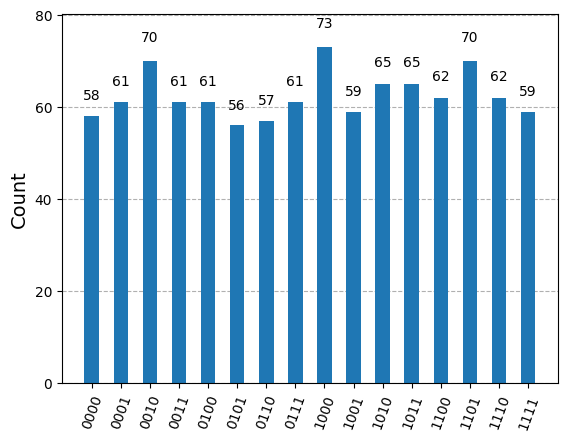

In [3]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Parámetros
a = 7
N = 15
num_qubits = 4  # Número de qubits para la entrada
num_ancilla = 3  # Qubits auxiliares

# Función para implementar la exponenciación modular
def modular_exponentiation(circuit, a, N, num_qubits, ancilla_qubits):
# Iterar sobre cada qubit de entrada
    for i in range(num_qubits):
        x = 2 ** i  # Valor de x
        power = a ** x % N
        
        # Implementación de puertas controladas
        for j in range(num_ancilla):
            # Controlamos la aplicación de la rotación Z
            if (power >> j) & 1:
                circuit.cp(np.pi / 2 ** (j + 1), i, ancilla_qubits[j])  # Usar i como control


# Construimos el circuito
qc = QuantumCircuit(num_qubits + num_ancilla, num_qubits)

# Inicializamos los qubits de entrada
for i in range(num_qubits):
    qc.h(i)  # Aplicar Hadamard para crear superposición

# Aplicamos la exponenciación modular
modular_exponentiation(qc, a, N, num_qubits, range(num_qubits, num_qubits + num_ancilla))

# Medimos los qubits
qc.measure(range(num_qubits), range(num_qubits))

# Visualizamos el circuito
print(qc)

# Simulamos el circuito

simulator = AerSimulator()
result = simulator.run(qc, shots=1000).result()
# counts = result.get_counts(circuit)
counts = result.get_counts(0)
counts
# Visualizamos los resultados
print("Resultados:", counts)
plot_histogram(counts)
